In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [2]:
gen = ImageDataGenerator(rotation_range=30, 
                         shear_range=0.2, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         horizontal_flip=True, 
                         vertical_flip=True
                         )
augment_ratio = 1.5
augment_size = int(augment_ratio * x_train.shape[0])

randidx = np.random.randint(x_train.shape[0], size=augment_size)

x_augmented = x_train[randidx].copy()
t_augmented = t_train[randidx].copy()

x_augmented, t_augmented = gen.flow(x_augmented, t_augmented, 
                                    batch_size=augment_size, 
                                    shuffle=False).next()

x_train = np.concatenate((x_train, x_augmented))
t_train = np.concatenate((t_train, t_augmented))

s = np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train = x_train[s]
t_train = t_train[s]

In [3]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3), 
               filters=32, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3, 3), filters=32, 
               activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, t_train, batch_size=256, epochs=250, validation_data=(x_test, t_test))

Epoch 1/250
489/489 [==============================] - 28s 31ms/step - loss: 1.8326 - accuracy: 0.3016 - val_loss: 1.3889 - val_accuracy: 0.4860
Epoch 2/250
489/489 [==============================] - 13s 27ms/step - loss: 1.4707 - accuracy: 0.4613 - val_loss: 1.1624 - val_accuracy: 0.5786
Epoch 3/250
489/489 [==============================] - 13s 26ms/step - loss: 1.2988 - accuracy: 0.5325 - val_loss: 1.0222 - val_accuracy: 0.6290
Epoch 4/250
489/489 [==============================] - 12s 25ms/step - loss: 1.1848 - accuracy: 0.5772 - val_loss: 0.9388 - val_accuracy: 0.6610
Epoch 5/250
489/489 [==============================] - 12s 24ms/step - loss: 1.0981 - accuracy: 0.6107 - val_loss: 0.8644 - val_accuracy: 0.6937
Epoch 6/250
489/489 [==============================] - 12s 24ms/step - loss: 1.0281 - accuracy: 0.6363 - val_loss: 0.8618 - val_accuracy: 0.7011
Epoch 7/250
489/489 [==============================] - 12s 24ms/step - loss: 0.9780 - accuracy: 0.6561 - val_loss: 0.7838 - val_ac

In [5]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7181 - accuracy: 0.8282


[0.7181230783462524, 0.8281999826431274]

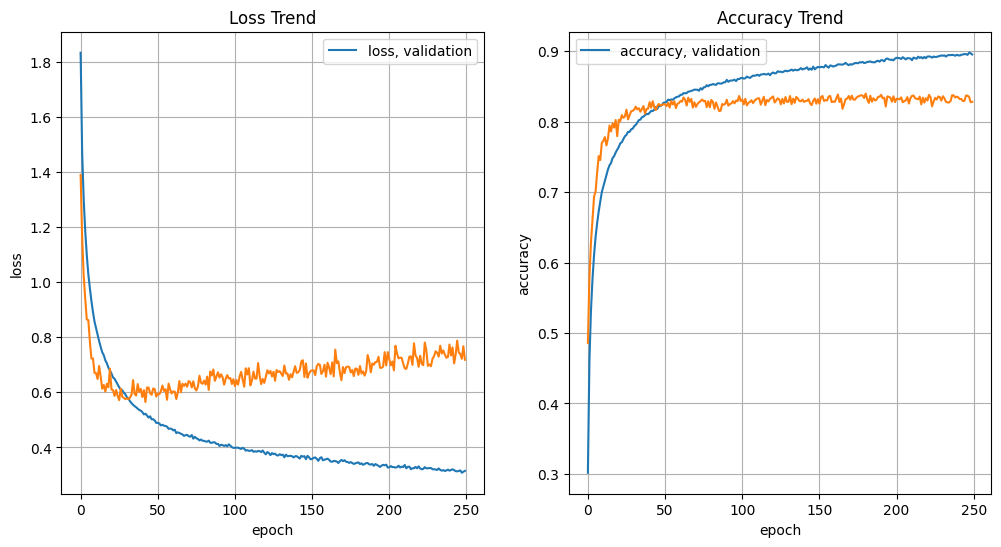

In [10]:
plt.figure(figsize=(12, 6))
title = ['Loss Trend', 'Accuracy Trend']
ypled = ['loss', 'accuracy']
plot2 = ['val_loss', 'val_accuracy']
legendloss = ['loss, validation']
legendaccu = ['accuracy, validation']
legend = [legendloss, legendaccu]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    plt.xlabel('epoch')
    plt.ylabel(ypled[i])
    plt.plot(hist.history[ypled[i]])
    plt.plot(hist.history[plot2[i]])
    plt.legend(legend[i], loc='best')
    plt.grid()

plt.show()